In [ ]:
import matplotlib,os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plotting

We use matplotlib as a plotting library. better to say the pyplot syntax from matplotlib. There are many other libraries that are designed for special tasks. e.g. seaborn is an excellent library for statistical plotting. Interestingly do many of these libraries build on Matplotlib. So Seaborn makes the same plots that Matplotlib can just chooses different colors and styles and automizes some things. The tricks you will learn here can thus be used there too. See the advanced tasks for some more examples.<br>
<br>
import matplotlib <br>
import matplotlib.pyplot as plt <br>
<br>
The last thing we have to do before we can start plotting is choosing a [Matplotlib backends](https://matplotlib.org/tutorials/introductory/usage.html#backends)
there are several classical available. The most useable are `inline`, `notebook`, `tk` and `qt`. 
`inline` is a passive one that is best to generate plots that are in the notebook and can thus be exported as PDF. "notebook" is an interactive one that is placed in the notebook too.

Both `tk` and `qt` are interactive and detached from the window. `qt` allows you to change pretty much all aspects of the plot with the mouse and is certainly the most comfortable. However, it sometimes does not work, depending on your local installation. For this course we will focus on the use of `inline`.

~~~python
%matplotlib notebook
%matplotlib inline...
~~~

in may cases changing the backend requires the restart of the Kernel.

## Matlab type plotting
The most simple type of plotting is what is often called matlab type plotting. From the Matplotlib library you use the command plot and give it one or two vectors.

In [ ]:
#standard matplab type plotting
x=np.arange(-5,5,0.01)
y=np.sin(2*np.pi*x)
plt.plot(x,y)
plt.xlim((-4,4)) # the order matters!

In [ ]:
#if you do not use an interactive backend like notebook or qt you sometimes (depending on the setting) need
plt.show()  # needed as we do not plot interactive
plt.ion()  #turn on interactives plotting (plots are updated as you change things)

This plotting call does a number of things in the background.
* open a window (here the window is placed in the script, if you use the `tk` backend you will see the window
* open an axis in the plot.
* plot the lines
* autoscale the lines.

This is great and works, but gives us less possibilities to manipulate things. Or to say change THAT.

This THAT is what is called a pointer. While there are way to generate those pointers later there are also other disadvantages like confusing syntax,... 

So we will take a slightly more complicated way and first create the figure with the axis manually and then plot.

In [ ]:
fig=plt.figure(figsize=(3,3)) #create a frame
ax=fig.add_subplot() # create a sheet to draw on
ax.plot(x,y)

now we could add more and more axis to plot and create e.g. insets or complex figures.
In most cases this can be simplified by the combined command

In [ ]:
fig,ax=plt.subplots() #for one plot
fig,ax=plt.subplots(1,3) # for three axis in a row
fig,ax=plt.subplots(1,3,figsize=(12,4)) # with size options....

Now we have 
* `fig` as a pointer to the figure and for example save the figure
* `ax` as a point to either the single frame in which we can plot or ax is a vector with one pointer per frame, so we can choose in which exact frame we want to plot something

Anyways the simplest plotting command is:

In [ ]:
fig,ax=plt.subplots() #for one plot
ax.plot(x,y)

now each of the axis we are using has a great number of things that you can adjust/optimise. But there is a nice structure to that, which makes it easy to remember. <br>
All options are divided into `get_` and `set_` 

test what you get for options with `ax.get_x` (press shift-tab)

## Task
Make plot the exponential function and add an xlabel and ylabel

Every element in a figure has such a handle/pointer and can thus be set.
<div>
<img src="Data/KEMM30_006.png" width="600">
</div>


## Example Task

We want to create a neat figure to plot the sinus function and adjust all options.

In [ ]:
# create Data
x=np.arange(0,4*np.pi,0.1)
y=np.sin(x)

#create Figure
fig,ax=plt.subplots(1,2,figsize=(11,3))
ax[0].plot(x,y,label='sine function')
ax[1].plot(x,y,label='sine function',color='green')

ax[0].set_title('original plot')
ax[1].set_title('modified plot')


ax[1].set_xticks(np.arange(0,4,1)*np.pi)                                   #set position of ticks manually
ax[1].set_xticklabels([f'{b/np.pi} π' for b in ax[1].get_xticks()])  #the labels are text! so all text replacement 
ax[1].set_xlabel('angular notation')                                 
ax[1].set_ylabel('intensity')
ax[1].legend()
ax[1].text(1 * np.pi, 0, r'$\pi$', fontsize=16);

While this looks complicated you build up the commands step by step until you like it. Or you can use the "qt" backend and change it by clicking. However one usually developes a nice looking template once and then reuses the same template over and over. Which makes this much faster than shaping the plot every time by mouse.

The one line that is complex (and using a _list comprehension_) above is:

```python
ax[1].set_xticklabels([f'{b/np.pi}π' for b in ax[1].get_xticks()])
```

lets rewrite this for you to understand

```python
labels=[]
list_of_current_ticks=ax[1].get_xticks()
for item in list_of_current_ticks:
    tick_label = f'{b/np.pi}π'
    labels.append(tick_label)
ax[1].set_xticklabels(labels)
```

There are many fully automatic ways to replace lables, but this always works and is just based on what you already learned can make the plot exactly how you want it.

Effectively all entries in the plot are a vector/list of either numbers or texts. So we create a list of labels that we attach to the list of numbers (ticks) we just set. By using "get_xticks" we make sure that we do not cheat. As you know how to shape strings...

### cheat sheets

How should I ever remember all of this? $\rightarrow$ you get used to it or you look it up/use a cheat sheet <br>
https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png      <br>
Or look in the folder Cheat cheats

## plotting types

### error bar plotting

Beside the standard plots one should plot in science data using error bars. 

In [ ]:
#download the data and set the filepath
import os
!git clone https://github.com/luchem/Kemm30.git --depth=1
path_to_files=os.sep.join([os.getcwd(),'Kemm30', 'lectures', 'Data'])

In [ ]:
# lets manually read some measurement data
raw_data = []
files = path_to_files + os.sep + 'data_with_error.csv'
with open(files, 'r') as f:
    for line in f:
        raw_data.append(line.split())

(x, y, yerr) = np.array(raw_data[1:], dtype=float).T

The previous import manually opened a file, line for line read the data and split it into separate strings

Then it converted this list of lists into an array. During the import a datatype was specified, which means that numpy tries to convert the read string into this datatype

The this array is transposed to make it match the tupel (x,y,yerr). now:

* x contains the "time[s]"
* y contains log($1-\frac{Abs}{Abs_{inf}}$)   Hint: if you look on the the code of this cell you can copy the exact string for the label
* yerr contains the error values of this measured curve

## Task

1. Create a figure with the size 14x4 inch and place two axis into it. 
2. on the first axis plot the y values with error bars using the function "errorbar" with the option "fmt='o'", don't forget to put a label on both axis!
3. On the second axis plot the data y as black line and lay above (plot after) an area from y-yerr to y+yerr, use the options facecolor='grey',edgecolor='face',alpha=0.5 (and of course test or read what these options mean and label the axis)

## Statistical plotting using numpy

While it might feel a bit strange to train how to "make" data, this is a very important part in science. It allows to you design experiments and test hypothesis.

A nice tool for this are random generators that are available e.g. in numpy. A few useful are the normal distribution, evenly distributed or choice generator. 

In [ ]:
vector_with_normal_distributed_values=np.random.normal(loc=0,scale=0.1,size=10)
vector_with_envenly_distributed_values=np.random.random(size=10)
vector_with_dice_rolls=np.random.choice([1,2,3,4,5,6],size=10)

For learning how to make different type of plots we start with an experiment in statistics. We an artifical treatment in which a measured size changes a little bit with the change of the conditions. Lets say, we count the number of bacterias in a sample and change how sour the trink is. Now we are performing a good experiment and repeat each experiment 10 times and determine our statistics from the variations.  

## Task 
From the following plot, is the difference between the median/mean of the experiments larger or smaller than the statistical expected fluctuations? Read the documentation of the boxplot to answer this question

In [ ]:
x_set = [3, 3.1, 2.9]
x_experiments = np.random.normal(loc = x_set, scale = 0.2, size = (10,3))

fig, ax = plt.subplots()
ax.boxplot(x_experiments); #hint the semicolon on the end silences the output of the statistical plot

## Smoothing

the opinions diverge when it comes to smoothing in science. But it can be very useful at times. While there are different splining procedures, we will focus on the [Savitzky Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter).

This filter combines an integration window with a polynom that is fitted into this window. So is a (5,1) filter a floating window filter, while a (5,3) filter fits a 3rd order polynomial to the data that also catches peaks quite well. As example we will use a water vibrational spectrum

In [ ]:
files=path_to_files + os.sep + 'water_spectrum.txt'
with open(files,'r') as f:
    data=[a.split(',') for a in f.readlines()]
    data=np.array(data,dtype=float)
artificial_noise=np.random.normal(scale=3e-6,size=len(data))
x=data[:,0]
y=data[:,1]+artificial_noise
fig,ax=plt.subplots()  
ax.plot(x,y)
from scipy.signal import savgol_filter
ax.plot(x,savgol_filter(y,5,3))

# Peak functions
you will notice that the water spectrum contains a lot of different peaks. In science two peak functions are commonly used to describe such shapes. One are lorentian peaks that are determined by the lifetime of the specific state. Most common is however a gaussian shape, that is defined by the random nature of noise. A gaussian function is described by ${\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\operatorname {exp} \left(-{\frac {\left(x-\mu \right)^{2}}{2\sigma ^{2}}}\right)$<br>
here $\mu$ is the center position of the peak and $\sigma$ is the value where the intensity droped to 1/e of the maximum.

In [ ]:
def gauss(x,mu=0,sigma=1):
    prefactor=1/np.sqrt(2*np.pi*(sigma**2))
    e_function=np.exp((-0.5/sigma**2)*(np.subtract(x,mu))**2)
    return prefactor*e_function

plt.close('all')
fig,ax=plt.subplots()
x=np.arange(-3,3,0.01)
ax.plot(x,gauss(x))

## Statistical sampling and plotting

Maybe we need to talk a bit about fluctuations in measurements. Lets take one of the most standard statistical experiments as an example. Rolling the dice.

~~~python
x=np.random.choice([1,2,3,4,5,6],size=100)
~~~

rolls 100 times the dice and returns an array with the numbers. This is our first experiment and our questions is: what is the average dice roll.

~~~python
x.mean()
~~~
    
To learn something about the distribution of this we need to repeat the experiment a few times. Lets say 1000 times and we store the averages in the vector averages.

In [ ]:
x=np.random.choice([1,2,3,4,5,6],size=(100,1000))
averages=x.mean(axis=0)
averages.shape

## Histograms

Histograms are one essential way to describe statistical data.  

While there are fully automated ways how to generate them, we will use np.histogram to have more controll. 

np.histogram returns first the "intensity" = how many counts and the edges of the bins. Edges of the bins means the beginning and then end of each "pocket"

In [ ]:
intensity,bin_edges=np.histogram(averages,bins=50)
print(intensity.shape)
print(bin_edges.shape)

note how the shape of bin_edges is one larger than the intensities in the bins? this is because these are Edges, meaning left and right corner of the bins. A usual way to define the center of the bin is to take the left corner plus the right corner and devide it by half.

also the automatic way how the bins are defined is not nessesary the best way. I usually prefer to create the bin myself with the following code:

In [ ]:
bins_into_histogram=np.arange(0,7,0.01)
intensity,bin_edges=np.histogram(averages,bins=bins_into_histogram)
bins=(bin_edges[:-1]+bin_edges[1:])/2

## Task
1. create a figure with one axis over the whole width.
2. plot the "bins" and "intensities" histogram calculating in the previous cell using a bar plot with grey bars. <br>Hint: change the bar width to 0.01
3. plot in the same axis a gaussian function with mu=average.mean() and sigma=average.std(with ddof=1) of all experiments and multiply the gaussian with 10. Why does this match so well? Why did we need to multiply by 10?
4. label all the x- and y scales (think about what should be on the axis)
5. change the x-axis to the range from 3.25 to 4.2
6. format the x-axis ticks to have precisely 2 after comma digits
7. format the y-axis in scientific notation (using exponents)
8. make a legend in the lower right corner. 
9. add extra text to the plot in which you write the parameter of the gaussian <br>(don't type this by hand, but use some kind of string replacement)
10. In an inset in the upper left corner we want to illustrate how the width of the curve would change with the number of samples.
    1. For this create an empty inset axis  in the upper left corner using **inset=ax.inset_axes([0.5,0.45,0.45,0.5])
    2. Write a loop in which you make 1000 experiments, in each of which you throw a dice 100, 200, 300,... 1000 times.   
    3. For each of these tests calculate the variance of the averages. The code for 1 and 2 is:
        ```python
        x=np.random.choice([1,2,3,4,5,6],size=(number_of_throws,1000))
        averages=x.mean(axis=0)
        variance=averages.std()
        ```
    4. Now plot these points into the inset with x= number of throws and y= the width.
    5. create an x-vector from  100-1000 in 10 throw steps and plot into the inset the line that results from the function: $\frac{1.75}{\sqrt{x}}$

The result should look something like this:

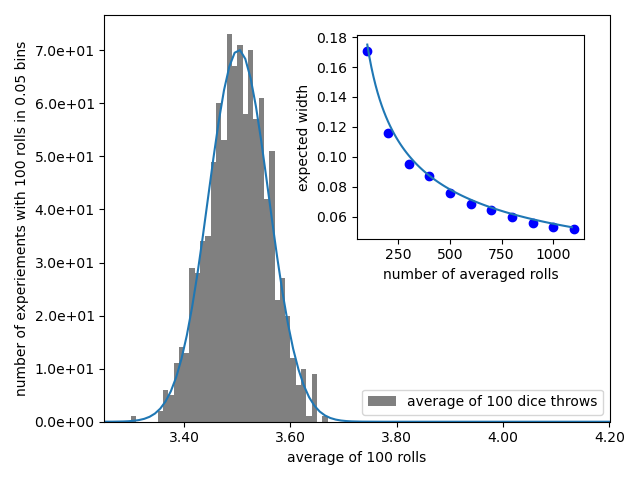


Placing insets can be difficult. There are in general 4 accepted ways to generate an inset.
1. predefined axes-level location codes using mpl_toolkits.axes_grid1.inset_axes
2. 
manual placement with axes-level coordinate (used here): Axes.inset_axe
3. 
manual placement with figure-level coordinates: Figure.add_ax (useful to place over multiple axis)
4. ;
multi-inset auto-lay ut:Axes.inset_axes with outset.layout_corner_insts.

# Advanced

## Task probability density

Create a scatterplot into the second axis with:
1. The x-coordinate is the value of the bins from above
2. For each bin you pull exactly as many evenly distributed random numbers as you have events in the bin. e.g. in the example from above approx 120  for x=3.5 (you can simply use the intensity from the histogram) multiply these numbers with the gaussian heigth calculated before so `height=np.random.rand(np.shape(y)[0])*gauss(x=y,mu=y.mean(),sigma=y.std())`
4. use markersize 2 for this plot
5. don't forget to label the axis and make a legend (use bbox_to_anchor to place it somewhere proper)

Advanced:
* In this scatterplot, plot all points inside the one sigma environment (=1/2 std diviation) of the mean in blue and all outside in red.
* hint: you can externally create a "slicing vector" by e.g. `a=x>5` and combine multiple of those with e.g np.all or simply use if conditions.

The final figure will look like this

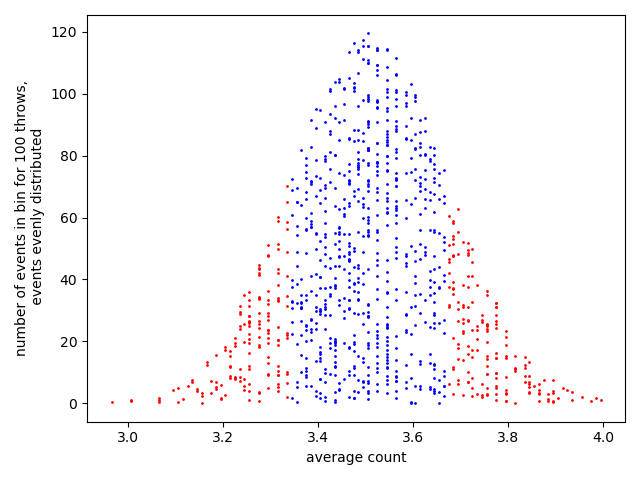

### Explanation:
If I throw a dice 100 times then in 68% of all cases the "real value" will be within the standard diviation of the data assuming that the data is normal distributed (like most measurements) often this is used as "error" of the measurement. for large number of discrete throws of dices this works, because of the:
https://en.wikipedia.org/wiki/Central_limit_theorem

We speak about the experiment (discrete value) and the model (the gaussian or normal distributed data). So the discrete model in fact says: If I throw my dice 100 times I will most likely get something around 350 as the sum of these throws and with 68% probability my result will lay within $350\pm 15$.

Important to remember: the variance is the 65% environment. To be more sure people often use the "two sigma environment" which then contains 98%

So with other words what from the statistics we can say is that the average of 100 dice throws will lay with 98% certainty between $3.5 \pm 2x0.15$ or between 3.2 and 3.8. The latter is what a careful scientist would say! Now quite instructive is to test how does this scale with the number of dice throws.

## combined matlab type plotting and object type plotting

There is a way to go from one type of plotting to the other by first getting a handle to the figure with <br>
`fig=plt.gcf()` #get current figure <br>
Then get a handle to all the axes <br>
`ax=fig.get_axes()` #get all axes <br>
If the figure only contains a single axes one can do this<br>
`ax=plt.gca()` #get current axis

Anyhow it is very confusing to combine both ways of plotting. So for any serious plotting use the object type plotting from the beginning!

## 2D plotting

2d plotting (as 3d plotting) means that you have to create coordinate information for each point of you matrix. so the first point need (1,1,z(1,1)) and so on. There are many ways how to do this, but np.meshgrid is a usual and fast way. Observe the difference between pcolormesh and imshow. The point is that a mesh is more than an image. It really has an axis that can be distorted.

In [ ]:
#lets plot a gaussian in 2d
x = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, x)
def gauss2d(X, Y, mu = (0,0), sigma = (1, 1)):
    scale = (sigma[0] + sigma[1]) * 2 * np.pi
    expo = (X - mu[0])**2 / (-2 * sigma[0]**2) + (Y - mu[1])**2 / (-2 * sigma[1]**2)
    return np.e**expo / scale
Z = gauss2d(X, Y)

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(16,4))
ax[0].imshow(Z)
ax[1].pcolormesh(X,Y,Z,cmap='viridis')
ax[2].pcolor(X,Y,Z,cmap='viridis')

### Task
create a sinodual wave. In the x-dimension the function follows a sinus. In y-dimension it follows a gaussian.
Hint: check np.tile and np.outer for help
plot this wave in 2d in a suitable region

Advanced: There are other libraries that provide you with interactive 2d/3d plots. This is one of the useful ones.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(16,8))
ax= fig.add_subplot(projection='3d')
surf=ax.plot_surface(X,Y,Z,cmap='jet',antialiased=False)
ax.contourf(X, Y, Z, zdir='z',offset=-0.05, cmap='jet')
ax.contourf(X, Y, Z, zdir='x',offset=-5,cmap='jet')
ax.contourf(X, Y, Z, zdir='y',offset=5, cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim3d(-0.05,0.06)
ax.set_xlabel('x-axis',labelpad=15)
ax.set_ylabel('y-axis',labelpad=15)
ax.set_zlabel('z-axis',labelpad=15)